In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test  = fetch_20newsgroups(subset='test')

In [3]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
newsgroups_train.target.size, newsgroups_test.target.size

(11314, 7532)

In [11]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [6]:
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test  = vectorizer.transform(newsgroups_test.data)

In [7]:
y_train = newsgroups_train.target
y_test  = newsgroups_test.target

In [8]:
y_train

array([7, 4, 4, ..., 3, 1, 8])

In [9]:
X_train.shape, y_train.shape

((11314, 130107), (11314,))

In [10]:
X_test.shape, y_test.shape

((7532, 130107), (7532,))

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
clf.score(X_test, y_test)

0.82793414763674988

In [16]:
X_train[0] # spase matrix となっている．

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [17]:
X_train_0 = X_train[0].toarray() # toarray でarrayに変換する．
X_train_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
np.count_nonzero(X_train_0), X_train_0.shape[1] # 13万次元中 ゼロでない特徴は89個しかない．

(89, 130107)

In [19]:
X_train_0[np.nonzero(X_train_0)]

array([ 0.06332604,  0.14155753,  0.13874908,  0.0953487 ,  0.03709893,
        0.10278592,  0.02991186,  0.0871642 ,  0.16713176,  0.09353931,
        0.13280753,  0.03770449,  0.0690878 ,  0.0343176 ,  0.38133891,
        0.07801368,  0.04951999,  0.06621689,  0.10015015,  0.11603643,
        0.0845253 ,  0.05461429,  0.09714744,  0.13412921,  0.05747015,
        0.08646963,  0.1558717 ,  0.02921528,  0.08342748,  0.03542092,
        0.06363421,  0.09785516,  0.02245166,  0.07313444,  0.07325812,
        0.05097865,  0.04280825,  0.09219024,  0.35383501,  0.01921946,
        0.09036441,  0.0690878 ,  0.06339409,  0.05989857,  0.10936401,
        0.03955173,  0.08844382,  0.03696979,  0.07000411,  0.13157119,
        0.03567186,  0.06521174,  0.05715821,  0.03188937,  0.01992886,
        0.0454964 ,  0.04114286,  0.09913274,  0.05545703,  0.03447138,
        0.10826904,  0.16068606,  0.05666562,  0.08171219,  0.0846283 ,
        0.09869735,  0.07526016,  0.10844725,  0.10809248,  0.01

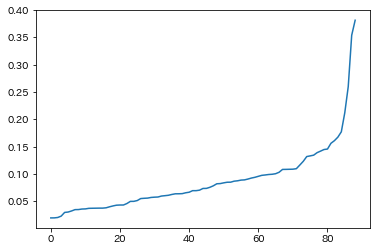

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(X_train_0[np.nonzero(X_train_0)]))

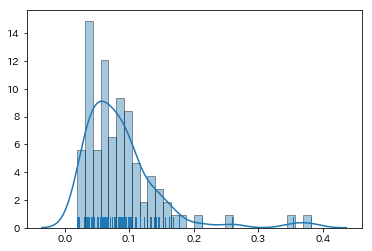

In [31]:
import seaborn as sns
sns.distplot(X_train_0[np.nonzero(X_train_0)], bins=30, rug=True)

ほとんどが0....なので値がある(1)なし(0)で2値化しようと試みる．

問題はどこからを0, 1にするかの閾値を決めること．

[sklearn.preprocessing.Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

In [20]:
from sklearn.model_selection import GridSearchCV

param = {'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}

gs1 = GridSearchCV(pipe, param, n_jobs=-1, verbose=2, cv=3)
gs1.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.001 ............................................
[CV] bin__threshold=0.01 .............................................
[CV] .............................. bin__threshold=0.01, total=  20.9s
[CV] bin__threshold=0.01 .............................................
[CV] ............................. bin__threshold=0.001, total=  22.6s
[CV] bin__threshold=0.01 .............................................
[CV] ............................. bin__threshold=0.001, total=  23.3s
[CV] bin__threshold=0.05 .............................................
[CV] ............................. bin__threshold=0.001, total=  24.2s
[CV] bin__threshold=0.05 .............................................
[CV] .............................. bin__threshold=0.05, total=   8.8s
[CV] bin__thresho

[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   47.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [21]:
gs1.best_params_, gs1.best_score_, gs1.best_estimator_

({'bin__threshold': 0.05}, 0.89137351953332156, Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [22]:
gs1.score(X_test, y_test)

0.82222517259691985

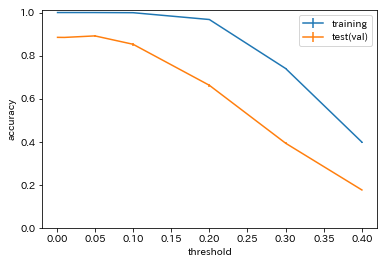

In [23]:
plt.errorbar(gs1.cv_results_['param_bin__threshold'].data, 
             gs1.cv_results_['mean_train_score'], 
             yerr=gs1.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs1.cv_results_['param_bin__threshold'].data,
             gs1.cv_results_['mean_test_score'], 
             yerr=gs1.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(0, 1.01)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.legend(loc="best");

ロジスティック回帰のパラメータをRandomSerchでやってみる．

In [24]:
pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs11.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] bin__threshold=0.05, clf__C=1000000000.0 ........................
[CV] bin__threshold=0.05, clf__C=1000000000.0 ........................
[CV] bin__threshold=0.05, clf__C=1000000000.0 ........................
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] ......... bin__threshold=0.05, clf__C=1000000000.0, total=  13.5s
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] ......... bin__threshold=0.05, clf__C=1000000000.0, total=  13.4s
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] ......... bin__threshold=0.05, clf__C=1000000000.0, total=  13.6s
[CV] bin__threshold=0.01, clf__C=10000000.0 ..........................
[CV] .............. bin__threshold=0.01, clf__C=10000.0, total=  25.9s
[CV] bin__threshold=0.01, clf__C=10000000.0 ..........................
[CV] .............. bin__threshold=0.01, clf__C=10000.0, total=  24.0s
[CV] bin__thresh

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [25]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 10.0},
 0.89172706381474276,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))]))

In [26]:
gs11.score(X_test, y_test)

0.82116303770578869

今度はLinearSVCでRandomizedSearch

In [27]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LinearSVC())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs2 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] bin__threshold=0.01, clf__C=10000.0 .............................
[CV] bin__threshold=0.01, clf__C=100.0 ...............................
[CV] .............. bin__threshold=0.01, clf__C=10000.0, total=   9.2s
[CV] bin__threshold=0.01, clf__C=100.0 ...............................
[CV] ................ bin__threshold=0.01, clf__C=100.0, total=   9.2s
[CV] bin__threshold=0.01, clf__C=100.0 ...............................
[CV] .............. bin__threshold=0.01, clf__C=10000.0, total=   9.6s
[CV] bin__threshold=0.001, clf__C=1000.0 .............................
[CV] .............. bin__threshold=0.01, clf__C=10000.0, total=  11.0s
[CV] bin__threshold=0.001, clf__C=1000.0 .............................
[CV] ................ bin__threshold=0.01, clf__C=100.0, total=   9.6s
[CV] bin__thresh

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([  1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07,   1.00000e+08,
         1.00000e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [28]:
gs2.best_params_, gs2.best_score_, gs2.best_estimator_

({'bin__threshold': 0.05, 'clf__C': 100.0},
 0.88165105179423719,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))]))

In [30]:
gs2.score(X_test, y_test)

0.79792883696229422

データが大きいのでSGD でやってみる．

In [31]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', SGDClassifier(loss="hinge") )]) # linearSVC

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__alpha': 10**np.arange(-10.0, -1.0) } # SGD ではalphaで正則化項を制御する．

from sklearn.model_selection import RandomizedSearchCV

gs22 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs22.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] bin__threshold=0.001, clf__alpha=0.0001 .........................
[CV] bin__threshold=0.001, clf__alpha=0.0001 .........................
[CV] bin__threshold=0.001, clf__alpha=0.0001 .........................
[CV] bin__threshold=0.01, clf__alpha=1e-10 ...........................
[CV] .......... bin__threshold=0.001, clf__alpha=0.0001, total=   1.0s
[CV] bin__threshold=0.01, clf__alpha=1e-10 ...........................
[CV] .......... bin__threshold=0.001, clf__alpha=0.0001, total=   1.0s
[CV] bin__threshold=0.01, clf__alpha=1e-10 ...........................
[CV] ............ bin__threshold=0.01, clf__alpha=1e-10, total=   0.9s
[CV] .......... bin__threshold=0.001, clf__alpha=0.0001, total=   1.0s
[CV] bin__threshold=0.05, clf__alpha=1e-09 ...........................
[CV] bin__threshold=0.05, clf__alpha=1e-09 ...........................
[CV] ............ bin__threshold=0.05, clf__alpha=1e-09, total=   0.6s
[CV] ............ bin__threshold=0.05, clf__alpha=1e-09, total=   0.6s
[CV] b

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [32]:
gs22.best_params_, gs22.best_score_, gs22.best_estimator_

({'bin__threshold': 0.01, 'clf__alpha': 0.01},
 0.8833303871309881,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.01)), ('clf', SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
        shuffle=True, tol=None, verbose=0, warm_start=False))]))

In [37]:
gs22.score(X_test, y_test)

0.81678173127987252

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gs22.predict(X_test)

In [44]:
print(classification_report(y_true=y_test, y_pred=y_pred, digits=4)) # digit: 出力の浮動小数点値をどれくらい出すか.の桁数を指定できる．

             precision    recall  f1-score   support

          0     0.8028    0.7147    0.7562       319
          1     0.7387    0.7121    0.7251       389
          2     0.6652    0.7817    0.7188       394
          3     0.8088    0.6582    0.7257       392
          4     0.7794    0.8260    0.8020       385
          5     0.8378    0.7190    0.7738       395
          6     0.7584    0.9256    0.8337       390
          7     0.9101    0.8434    0.8755       396
          8     0.9148    0.9447    0.9295       398
          9     0.8694    0.9219    0.8949       397
         10     0.8798    0.9724    0.9238       399
         11     0.9025    0.9116    0.9070       396
         12     0.7644    0.6768    0.7179       393
         13     0.8195    0.8258    0.8226       396
         14     0.8765    0.9010    0.8886       394
         15     0.8458    0.9372    0.8892       398
         16     0.7175    0.8791    0.7901       364
         17     0.9527    0.8564    0.9020   

In [48]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[228,   1,   0,   1,   1,   1,   3,   0,   0,   3,   2,   2,   2,
          9,   5,  19,   0,   5,   0,  37],
       [  4, 277,  29,   8,  10,  23,  10,   0,   2,   4,   1,   3,   6,
          1,   3,   3,   1,   1,   2,   1],
       [  1,  15, 308,  20,   9,  10,   6,   0,   2,   5,   2,   1,   1,
          1,   4,   1,   1,   0,   2,   5],
       [  2,   9,  36, 258,  28,   3,  18,   6,   1,   0,   2,   2,  22,
          0,   1,   1,   1,   0,   2,   0],
       [  0,   7,  10,   6, 318,   1,  15,   1,   2,   5,   0,   0,  12,
          6,   0,   1,   0,   0,   1,   0],
       [  1,  30,  40,   4,   5, 284,   5,   2,   1,   0,   2,   5,   6,
          2,   5,   1,   1,   0,   0,   1],
       [  0,   1,   2,   5,   4,   0, 361,   2,   0,   1,   1,   1,   7,
          3,   1,   1,   0,   0,   0,   0],
       [  0,   1,   2,   2,   2,   1,  14, 334,  12,   3,   3,   0,  10,
          4,   1,   2,   3,   1,   1,   0],
       [  0,   0,   0,   1,   1,   0,   5,   7, 376,   0,   0,  

In [54]:
import pandas as pd

pd.DataFrame(conf_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,228,1,0,1,1,1,3,0,0,3,2,2,2,9,5,19,0,5,0,37
1,4,277,29,8,10,23,10,0,2,4,1,3,6,1,3,3,1,1,2,1
2,1,15,308,20,9,10,6,0,2,5,2,1,1,1,4,1,1,0,2,5
3,2,9,36,258,28,3,18,6,1,0,2,2,22,0,1,1,1,0,2,0
4,0,7,10,6,318,1,15,1,2,5,0,0,12,6,0,1,0,0,1,0
5,1,30,40,4,5,284,5,2,1,0,2,5,6,2,5,1,1,0,0,1
6,0,1,2,5,4,0,361,2,0,1,1,1,7,3,1,1,0,0,0,0
7,0,1,2,2,2,1,14,334,12,3,3,0,10,4,1,2,3,1,1,0
8,0,0,0,1,1,0,5,7,376,0,0,0,1,3,1,0,1,0,1,1
9,0,0,1,0,2,0,7,0,1,366,16,0,1,1,0,0,0,0,0,2


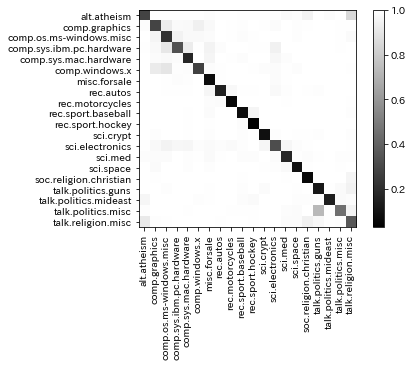

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

plt.imshow(1- conf_mat / conf_mat.sum(axis=1), # conf_matの列ごとの合計で割って正規化する． imshowで画像として表示する．
           interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names);
plt.xticks(range(20), newsgroups_train.target_names, rotation=90); # メモリの表示を左へ90ど傾ける．
plt.colorbar()
# seaborn.heatmapの方が良さそう．

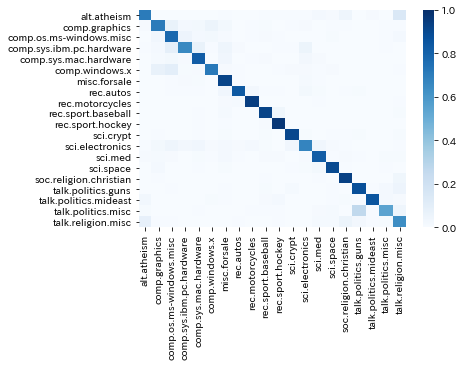

In [67]:
import seaborn as sns

frame = pd.DataFrame(conf_mat / conf_mat.sum(axis=1), columns=newsgroups_train.target_names, index=newsgroups_train.target_names)

sns.heatmap(frame, cmap='Blues', vmin=0, vmax=1)